# Modelos de memorias matriciales

En este práctico, trataremos de hacer el salto conceptual de una neurona a redes de neuronas. Para ello, abordaremos principalmente el capítulo 3 de *Fundamentals of computational neuroscience* de Trappenberg.

*Nota: En el Cuaderno 2 vimos una introducción a Numpy y Matplotlib. En este práctico haremos una introducción aún mas breve, por lo que en caso de dudas, pueden fijarse en el Cuaderno 2.*

Comenzaremos, como siempre, importando las librerías que vamos a utilizar:

In [26]:
# Importamos NumPy
import numpy as np

# Para evitar imprimir números decimales muy largos, modificamos el formateador de Numpy:
np.set_printoptions(precision=2)

# Importamos SciPy
import scipy as sp

# Importamos Matplotlib
import matplotlib.pyplot as plt

import ipywidgets as widgets

In [83]:
def visualizar_vector(v):
  """ Dibuja un vector 2D

  Argumentos:
    v (ndarray): array de tamaño (2,) con las coordenadas del vector
  """
  fig, ax = plt.subplots()

  # Set up plot aesthetics
  ax.spines['top'].set_color('none')
  ax.spines['bottom'].set_position('zero')
  ax.spines['left'].set_position('zero')
  ax.spines['right'].set_color('none')
  ax.set(xlim = [-6, 6], ylim = [-6, 6])
  ax.grid(True, alpha=.4)

  # Plot vectors
  v_arr = ax.arrow(0, 0, v[0], v[1], color='black', width=0.08, length_includes_head=True)
  ax.set(xlim = [-4, 4], ylim = [-4, 4])

Consideremos primero un vector $\pmb{a}$ definido como:

$$ \pmb{a} = \begin{bmatrix} a_{1} \\ a_{2} \end{bmatrix} $$

Un vector se puede considerar desde al menos dos perspectivas: como una lista ordenada de números o como una flecha con la base en el origen de un sistema de coordenadas. Son dos maneras de mirar lo mismo: en el caso de la flecha, la punta está definida por una coordenada (que puede representarse con la lista ordenada).

La **dimensionalidad** de un vector está determinada por la cantidad de componentes en la lista ordenada (o por la dimensionalidad del espacio en el que existe la flecha). Decimos, entonces, que este vector de dos dimensiones tiene 2 componentes: $a_1$ y $a_2$.

Veamos como inicializar y visualizar un vector arbitrario en Numpy.

In [92]:
a = np.array([2, 1])
print(a)

[2 1]


Cuando lo imprimimos, un vector no parece ser otra cosa que una lista ordenada. Generalmente, es mejor visualizarlo como una flecha en un espacio n-dimensional. Ejecutá la celda siguiente para visualizar este vector en un espacio de dos dimensiones:

In [93]:
@widgets.interact(a1=widgets.IntSlider(2, -4, 4, description="$a_{1}$"), a2=widgets.IntSlider(1, -4, 4, description="$a_{2}$"))
def interactive(a1, a2=1):
  visualizar_vector(np.array([a1, a2]))

interactive(children=(IntSlider(value=2, description='$a_{1}$', max=4, min=-4), IntSlider(value=1, description…

## Producto escalar

Hasta ahora los componentes del vector no han tenido ningún significado. Definamos entonces un modelo neuronal muy simple: un sistema de dos neuronas en el cual podemos medir su actividad. El vector $\pmb{x}$ define la actividad de las dos neuronas en un instante dado:

$$ \pmb{x} = \begin{bmatrix} 2 \\ 3 \end{bmatrix} $$

Tiene, entonces, dos componentes: $x_{1}$ y $x_{2}$. Uno para definir la actividad de cada neurona.

Agreguemos una tercera neurona cuya actividad esté mediada por la actividad de del sistema de neuronas recién definido. Para modelar la influencia que cada neurona pueda tener sobre esta tercera neurona, podemos definir un segundo vector $\pmb{z}$:

$$ \pmb{z} = \begin{bmatrix} 1 \\ 4 \end{bmatrix} $$

donde sus compontentes, $z_{1}$ y $z_{2}$, modelan el peso que tiene cada neurona $x_{1}$ y $x_{2}$ respectivamente sobre esta tercera neurona.

La actividad de esta tercera neurona se puede modelar como el **producto escalar** entre estos dos vectores:

$$ \pmb{x} \cdot \pmb{z} = x_{1} z_{1} + x_{2} z_{2} = 2 \times 1 + 3 \times 4 = 14 $$

El producto escalar (también conocido producto interno o producto punto) es entonces la suma ponderada entre dos componentes de dos vectores de igual dimension. En su forma genérica, se define como:

$$ \pmb{a} \cdot \pmb{b} = \sum_{i}a_ib_i $$

En Numpy, usamos el método `.dot()` para calcular el producto escalar de dos vectores:

In [107]:
x = np.array([2, 3])
z = np.array([1, 4])

print(x.dot(z))

14


## Norma

El largo, o la norma $\lVert \pmb{a} \rVert$, de un vector $\pmb{a}$ se calcula como:

$\lVert \pmb{a} \rVert = \sqrt{\sum_i a_i ^ 2}$

Usando el producto escalar como herramienta de sintetización, podemos reescribir la norma como:

$\lVert \pmb{a} \rVert = \sqrt{\pmb{a'} \pmb{a}}$

Vamos como hacerlo en Python:

In [110]:
norm = np.sqrt(x.dot(x))
print(norm)

3.605551275463989


*Ejercicio: calcule la norma de todos los vectores e.*

entre un vector columna y un vector fila. Como nuestros vectores tienen una columna, para obtener el producto escalar necesitamos trasponer uno de ellos:

$$ \pmb{a} \cdot \pmb{b} = \pmb{a'} \pmb{b} = \sum_{i}a_ib_i $$

En Numpy, usamos el método `.dot()` en conjunto con la traspuesta `.T` para calcular el producto escalar de dos matrices:

*Ejercicio: calcule el producto escalar entre todos los vectores e, incluyendo consigo mismos.*

<details>
    <summary>
        <b>Pregunta:</b> ¿Qué propiedad cumplen los vectores <i>e<sub>i</sub></i> para que sus productos internos den los resultados de arriba?
    </summary>
    Son ortogonales, los datos no estan correlacionados si los vectores de los datos fueran ortogonales, y tienen norma 1 (la norma del vector es el largo del vector). Decimos entonces que son <i>ortonormales</i>.
</details>


En general, preferimos ver a los vectores como un caso especial de las matrices. Las matrices son colecciones de escalares o vectores. Hablamos de una matriz de $n \times m$ donde $n$ es el número de filas y $m$ el número de columnas, y tienen la forma:

$\pmb{a} = \begin{bmatrix} a_{11} & a_{12} \\ a_{21} & a_{22} \\ a_{31} & a_{32} \\ a_{41} & a_{42} \end{bmatrix}$

Por lo tanto, los vectores son sencillamente matrices de $n \times 1$.

Consideremos primero un vector $\pmb{a}$ definido como:

$\pmb{a} = \begin{pmatrix} a_{1} \\ a_{2} \\ a_{3} \\ a_{4} \end{pmatrix}$

Decimos que este vector tiene 4 componentes $a_1$, $a_2$, $a_3$ y $a_4$. Para trabajar con números en lugar de componentes abstractos, en esta breve introducción, vamos a comenzar definiendo cuatro vectores de entrada $\pmb{e}_i$ de la siguiente forma:

$\pmb{e}_1 = \begin{pmatrix} 0.5 \\ 0.5 \\ 0.5 \\ 0.5 \end{pmatrix}$
$\pmb{e}_2 = \begin{pmatrix} 0.5 \\ -0.5 \\ 0.5 \\ -0.5 \end{pmatrix}$
$\pmb{e}_3 = \begin{pmatrix} 0.5 \\ 0.5 \\ 0.5 \\ -0.5 \end{pmatrix}$
$\pmb{e}_4 = \begin{pmatrix} 0.5 \\ -0.5 \\ -0.5 \\ 0.5 \end{pmatrix}$

En Python, y específicamente con Numpy, preferimos ver a los vectores como un caso especial de las matrices. Las matrices son colecciones de escalares o vectores. Hablamos de una matriz de $n \times m$ donde $n$ es el número de filas y $m$ el número de columnas, y tienen la forma:

$\pmb{a} = \begin{pmatrix} a_{11} & a_{12} \\ a_{21} & a_{22} \\ a_{31} & a_{32} \\ a_{41} & a_{42} \end{pmatrix}$

Por lo tanto, los vectores son sencillamente matrices de $n \times 1$ y se pueden definir, como es usual en Numpy, usando el método `np.array()`:

In [2]:
e_1 = 0.5 * np.array([[1], [1], [1], [1]])
e_2 = 0.5 * np.array([[1], [-1], [1], [-1]])
e_3 = 0.5 * np.array([[1], [1], [-1], [-1]])
e_4 = 0.5 * np.array([[1], [-1], [-1], [1]])

Imprimamos el vector $\pmb{e_1}$:

In [3]:
print(e_1)

[[0.5]
 [0.5]
 [0.5]
 [0.5]]


Tratar a los vectores como matrices tiene la ventaja de que podemos usar las mismas operaciones ya definidas para matrices de forma natural. Veamos algunas de ellas que nos serán de mucha utilidad.

*Ejercicio: Pruebe imprimir los demas vectores de entrada.*

## Traspuesta

La *traspuesta* de una matriz se logra girándola 90 grados; la primera fila se vuelve la primera columna, la segunda fila se vuelve la segunda columna, y así hasta convertir todas las filas en columnas. Por ejemplo, la traspuesta de $\pmb{a}$ se define como:

$\pmb{a'} = \begin{pmatrix} a_{11} & a_{21} & a_{31} & a_{41} \\ a_{12} & a_{22} & a_{32} & a_{42} \end{pmatrix}$

En Python usamos la propiedad `.T` para obtener la traspuesta:

In [4]:
print(e_1.T)

[[0.5 0.5 0.5 0.5]]


*Ejercicio: Pruebe imprimir la traspuesta de los demas vectores de entrada.*

## Nuestra primera red neuronal



Ahora, en una red neuronal, los vectores de entradas van a ser un vector con números que representarán las diferentes entradas que ingresan a la neurona. Se llama vector porque podría estar en un espacio n-dimensional y esto marca una flecha entre cero y ese punto. Tiene propiedades de los vectores y se puede definir el producto escalar. Cuando el mismo es 0, indica que el vector es ortogonal. Cada número de esos vectores representa la actividad de una fibra. El problema de aprendizaje sería que dada una entrada, se produzca una salida.

Creemos ahora vectores de salida $s_i$, de largo 3, que estarán asociados con cada vector de entrada $e_i$ que definimos arriba.

$s_1 = \begin{pmatrix} 12 \\ 0.31 \\ \pi \end{pmatrix}$
$s_2 = \begin{pmatrix} -5 \\ 3.1 \\ 0.2 \end{pmatrix}$
$s_3 = \begin{pmatrix} 1 \\ -1 \\ -1 \end{pmatrix}$
$s_4 = \begin{pmatrix} \sqrt 2 \\ e \\ 0 \end{pmatrix}$

Que, recordemos, estaban definidos como:

$\pmb{e}_1 = \begin{pmatrix} 0.5 \\ 0.5 \\ 0.5 \\ 0.5 \end{pmatrix}$
$\pmb{e}_2 = \begin{pmatrix} 0.5 \\ -0.5 \\ 0.5 \\ -0.5 \end{pmatrix}$
$\pmb{e}_3 = \begin{pmatrix} 0.5 \\ 0.5 \\ 0.5 \\ -0.5 \end{pmatrix}$
$\pmb{e}_4 = \begin{pmatrix} 0.5 \\ -0.5 \\ -0.5 \\ 0.5 \end{pmatrix}$

In [7]:
s_1 = np.array([[12], [0.31], [np.pi]])
s_2 = np.array([[-5], [3.1], [0.2]])
s_3 = np.array([[1], [-1], [-1]])
s_4 = np.array([[np.sqrt(2)], [np.e], [0]])

Las salidas pueden tener distintas dimensionalidades que el vector de entrada. Si por ejemplo calculamos el producto escalar entre salida y entrada y no es cero, entonces las mismas están relacionadas.

In [8]:
print(s_1.T.dot(s_2))

[[-58.41]]


El objetivo de nuestra red neuronal es encontrar una matriz $\pmb{m}$ de tal forma que cada vez que la multiplico por $\pmb{e_i}$ me de como resultado el vector $\pmb{s_i}$ correspondiente. Es decir, que cumpla:

$\begin{split}
\pmb{e_1} \cdot \pmb{m} &= \pmb{s_1} \\
\pmb{e_2} \cdot \pmb{m} &= \pmb{s_2} \\
\pmb{e_3} \cdot \pmb{m} &= \pmb{s_3} \\
\pmb{e_4} \cdot \pmb{m} &= \pmb{s_4} \\
\end{split}$

Para encontrarlo, basta con definir a $\pmb{m}$ como :

$\pmb{m} = \pmb{s_1} \cdot \pmb{e_1} + \pmb{s_2} \cdot \pmb{e_2} + \pmb{s_3} \cdot \pmb{e_3} + \pmb{s_4} \cdot \pmb{e_4}$

La versión de la regla Hebbiana es hacer el producto externo. Lo que vimos en la clase de multiplicar las entradas por las salidas y que nos genere los pesos, esa es la matriz que se va a generar en el producto externo que da como resultado una matriz. Veamos como hacerlo en Python:

In [9]:
# Cada vez que tengo una entrada y salida, estoy multiplicando y sumando las entradas
m = s_1.dot(e_1.T) + s_2.dot(e_2.T) + s_3.dot(e_3.T) + s_4.dot(e_4.T)
print(m) 

[[ 4.71  8.29  2.29  8.71]
 [ 2.56 -3.25  0.85  0.46]
 [ 1.17  0.97  2.17  1.97]]


¡Felicidades! Acaba de crear su primera red neuronal, que puede asociar las entradas $\pmb{e_i}$ con las salidas $\pmb{s_i}$.

A continuación ponemos a prueba la red. Primero verificamos que la salida del producto interno entre $\pmb{m}$ y el vector $\pmb{e_2}$ de como resultado el vector deseado $\pmb{s_2}$:

In [10]:
# Imprimo la entrada e1
print(e_1)

# Imprimo la red neuronal
print(m)

# Imprimo el producto de M y e1
print(m.dot(e_1))

 # Imprimo la salida esperada s1
print(s_1)

[[0.5]
 [0.5]
 [0.5]
 [0.5]]
[[ 4.71  8.29  2.29  8.71]
 [ 2.56 -3.25  0.85  0.46]
 [ 1.17  0.97  2.17  1.97]]
[[12.  ]
 [ 0.31]
 [ 3.14]]
[[12.  ]
 [ 0.31]
 [ 3.14]]


*Ejercicio: Pruebe que salida produce para las demás entradas.*

## Similitud de vectores

Cuando comparamos vectores, muchas veces lo que nos interesa es el ángulo entre los mismos, que nos da una relación de similitud que descuenta el largo de los vectores, y que tiene varias ventajas analíticas.

El ángulo entre dos vectores $\pmb{a}$ y $\pmb{b}$ se calcula tomando el producto interno entre los vectores, dividido por el producto de la norma de cada vector:

$$\cos{(\theta(\pmb{a},\pmb{b}))} = \frac{\pmb{a} \cdot \pmb{b}}{\lvert \pmb{a} \rvert \lvert \pmb{b} \rvert} $$

Abajo calculamos el coseno del ángulo entre la salida obtenida del producto de *e4* y *M*, y la salida esperada *s4*.

**Nota:** Cuando el coseno del ángulo es 1, los vectores son paralelos, y cuando es 0 son ortogonales.

In [11]:
# Obtenemos la salida con la matriz m
s_4r = m.dot(e_4)

# Norma del vector obtenido con la red
norma_s_4r = np.sqrt(s_4r.T.dot(s_4r))

# Norma del vector esperado
norma_s_4 = np.sqrt(s_4.T.dot(s_4))

# Calculamos el coseno
coseno_vectores = s_4r.T.dot(s_4) / (norma_s_4r * norma_s_4)

#Imprimimos el resultado
print(coseno_vectores)

[[1.]]


Un coseno de 1 significa que el vector que predijo la red neuronal es paralelo (equivalente) al esperado.

La red neuronal $\pmb{m}$ puede asociar correctamente las entradas $\pmb{e_i}$ con las salidas $\pmb{s_i}$. Pero que ocurre si en lugar de utilizar una entrada conocida, como por ejemplo $\pmb{e_4}$, utilizamos como entrada un vector similar pero no igual a este. ¿La matriz la asocia a una salida similar a $\pmb{s_4}$?

Para averiguarlo, definimos un nuevo vector $\pmb{e_{4p}}$ ($\pmb{e_4}$ perturbado), sumándole 0.1 a cada entrada de $\pmb{e_4}$:

$\pmb{e_{4p}} = \begin{pmatrix} 0.5 + 0.1 \\ -0.5 + 0.1 \\ -0.5 + 0.1 \\0.5+0.1 \end{pmatrix}$

In [12]:
# Definimos el nuevo vector de entrada
e_4p = e_4 + 0.1

# Obtenemos la salida con la matriz m para ambas entradas
s_4r = m.dot(e_4)
s_4p = m.dot(e_4p)

# Imprimimos la salida de la red con el vector original
print(s_4r)

# Imprimimos la salida de la red con nuevo vector perturbado
print(s_4p)

[[1.41]
 [2.72]
 [0.  ]]
[[3.81]
 [2.78]
 [0.63]]


¿Son estas salidas similares? Usemos el coseno como herramienta para medirlo:

In [13]:
# Norma del vector obtenido
norma_s_4p = np.sqrt(s_4p.T.dot(s_4p))

# Norma del vector esperado
norma_s_4 = np.sqrt(s_4.T.dot(s_4))

# Calculamos el coseno
coseno_vectores = s_4p.T.dot(s_4 ) / (norma_s_4p * norma_s_4)

#Imprimimos el resultado
print(coseno_vectores)

[[0.89]]


Un coseno cercano a 1 significa que la red neuronal no solo puede asociar correctamente los vectores de entrada a los de salida esperados, sino que también puede asociar vectores parecidos a los de entrada a vectores parecidos a los de salida. Es decir, puede asociar vectores nuevos, no solo los que aprendió.

## Red neuronal 2.0

A continuación hacemos una nueva red un poco más grande. Para eso primero vamos a crear nuestras entradas 'ortonormales', que la red puede recordar fácilmente:

In [14]:
# Primero generamos una matriz de números aleatorios entre 0 y 1, con un tamaño de 100 filas y 30 columnas
A = np.random.random((100,30))
print(f"La matriz A tiene forma", A.shape)
print(f"Esta es la primera columna de A\n{A[:,1]}")
print(f"Este es el producto interno de las columnas 1 y 2: {(A[:,1].T).dot(A[:,2]):.1f}") 

La matriz A tiene forma (100, 30)
Esta es la primera columna de A
[0.84 0.07 0.35 0.74 0.79 0.44 0.89 0.24 0.45 0.62 0.09 0.86 0.07 0.93
 0.57 0.33 0.84 0.07 0.05 0.85 0.02 0.3  0.69 0.18 0.75 0.51 0.22 0.52
 0.66 0.82 0.39 0.24 0.79 0.53 0.35 0.82 0.24 1.   0.38 0.95 0.82 0.03
 0.95 0.05 0.15 0.41 0.41 0.02 0.89 0.94 0.16 0.87 0.95 0.59 0.34 0.1
 0.43 0.   0.42 0.56 0.06 0.23 0.19 0.71 0.09 0.28 0.71 0.43 0.14 0.93
 0.89 0.95 0.43 0.7  0.01 0.16 0.82 0.23 0.66 0.14 0.33 0.43 0.59 0.99
 0.97 0.93 0.24 0.65 0.74 0.26 0.29 0.35 0.42 0.52 0.1  0.65 0.32 0.37
 0.11 0.4 ]
Este es el producto interno de las columnas 1 y 2: 23.1


In [15]:
# Luego usamos un truco de algebra lineal (llamado SVD) que nos permite obtener
# una matriz con 30 columnas ortogonales a partir de A
E = sp.linalg.orth(A)
print((E[:,7].T).dot(E[:,1])) # Vemos que el producto interno entre columnas sea 0 (o cercano). Pruebe otras columnas

3.6875214597983435e-17


La matriz E tiene columnas que son ortogonales.

In [16]:
print((E[:,2].T).dot(E[:,4]))

9.437084037619208e-17


**Preguntas:** ¿Cuál es la norma de cada columna?

In [17]:
np.sqrt(E[:,7].T.dot(E[:,7]))

0.9999999999999989

Ahora creamos nuestras salidas.

In [18]:
S = np.eye(30)

*Ejercicio: Imprima las salidas*

Y creemos la red neuronal de la misma forma que lo hicimos anteriormente:

In [19]:
M = S.dot(E.T)

Probemos como funciona

In [20]:
#E 2 es la tercera columna de la matriz de entrada. El tercer lugar da un uno, que se explica por la salida correspondiente.
# Cada una de las columnas de E, se asocia a las salidas de S.
salida = M.dot(E[:,3])
print(salida*(abs(salida)>0.00001))

[-0. -0.  0.  1.  0. -0. -0.  0. -0. -0.  0.  0.  0. -0.  0.  0. -0.  0.
 -0. -0.  0. -0.  0.  0. -0. -0. -0. -0.  0.  0.]


Es bueno mirar como queda la matriz M. Para eso hacemos:

In [21]:
print(M)

[[-0.11 -0.09 -0.1  ... -0.11 -0.09 -0.11]
 [ 0.15 -0.15 -0.12 ...  0.04 -0.19  0.07]
 [ 0.03  0.07  0.07 ...  0.21 -0.13 -0.11]
 ...
 [-0.08  0.07  0.04 ... -0.05 -0.12  0.01]
 [-0.13  0.06  0.   ...  0.18 -0.04 -0.16]
 [-0.13 -0.16  0.2  ...  0.16  0.13  0.04]]


También podemos mirar como queda la matriz M utilizando Matplotlib para dibujar las filas y columnas con colores, un color oscuro significa que hay un valor cercano a 0, mientras que un color claro significa que es un valor cercano a 1:

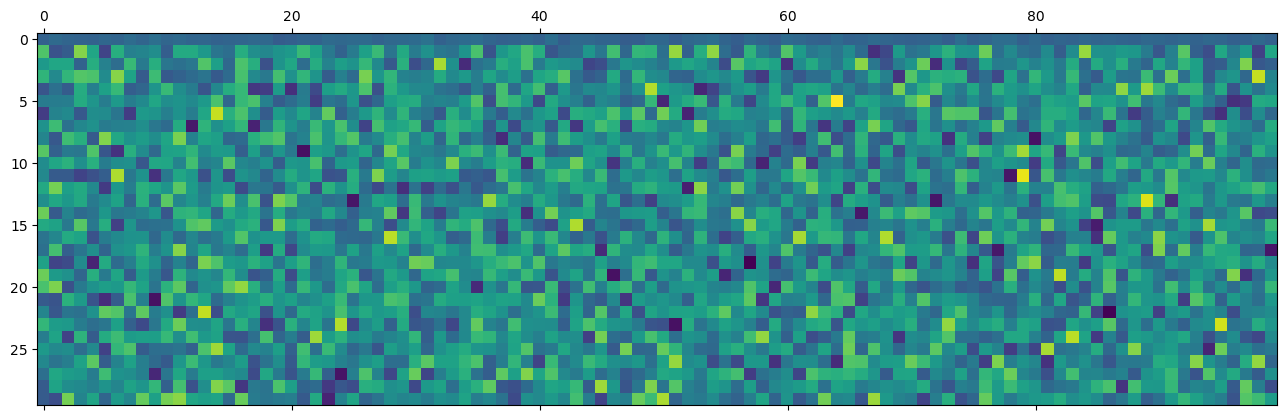

In [22]:
plt.matshow(M)

Vamos a intentar hacer lo siguiente. vamos destruyendo la matriz al azar probamos qué tanto correlacionan las salidas deseadas con las salidas obtenidas. Primero a mano y viendo el resultado. Luego haremos un programa.

In [23]:
# Copio la red para no modificarla
Mp = M.copy()

# Defino una entrada cualquiera
E_i = E[:,2]

# Pruebo una entrada
S_r = Mp.dot(E_i)

# Pongo una componente cualquiera de la matriz igual a 0
Mp[7,52] = 0 

# Pruebo de vuelta
S_rp = Mp.dot(E_i)

# Imprimimos los resultados
print(S_r)
print(S_rp)

# Calculamos sus normas
norma_S_r = np.sqrt(S_r.T.dot(S_r))
norma_S_rp = np.sqrt(S_rp.T.dot(S_rp))

# Calculamos el coseno
coseno_vectores = S_r.T.dot(S_rp) / (norma_S_r * norma_S_rp)

# Imprimimos el coseno
print(coseno_vectores)

[ 2.64e-17  7.99e-17  1.00e+00  2.97e-17  1.01e-16 -1.02e-16  6.57e-17
 -8.64e-17 -4.02e-18 -9.08e-17 -8.30e-17  2.25e-17  2.65e-16  1.48e-16
 -3.00e-16 -1.01e-16 -1.17e-16 -3.42e-16 -1.53e-16 -2.13e-16  2.07e-16
  2.27e-16 -5.56e-17 -9.10e-17  1.64e-16 -2.94e-16  4.55e-17  1.93e-18
  2.40e-16 -1.62e-17]
[ 2.64e-17  7.99e-17  1.00e+00  2.97e-17  1.01e-16 -1.02e-16  6.57e-17
 -1.70e-03 -4.02e-18 -9.08e-17 -8.30e-17  2.25e-17  2.65e-16  1.48e-16
 -3.00e-16 -1.01e-16 -1.17e-16 -3.42e-16 -1.53e-16 -2.13e-16  2.07e-16
  2.27e-16 -5.56e-17 -9.10e-17  1.64e-16 -2.94e-16  4.55e-17  1.93e-18
  2.40e-16 -1.62e-17]
0.9999985472558776


Observaciones:

1. Si yo destruyo pesos de la matriz la misma sigue funcionando, el lugar correspondiente dará un valor bien cercano a 1.
2. Tiene resistencia a la rotura porque hay mucha redundancia en la matriz. Esto nos permite ir rompiendo y acercándonos a 1.
3. Vemos como el coseno del angulo entre el vector salida y el vector entrada siempre está cerca de 1.
4. Esto es una propiedad interesante vinculada a las memorias de corte biológico. Se puede romper o perturbar el vector y el sistema da una salida medianamente correcta.
5. La tolerancia al daño y la capacidad para generalizar son la base de los fenómenos colectivos de estas redes neuronales. La propiedad distribuida por varios lugares. La memoria está en los pesos.
6. En este modelo de memoria, yo no represento a los objetos, tengo información para reconstruir la representación de los objetos.
7. Almacenamiento de la información superpuesta y distribuida.

Podemos hacer una evaluación más sistemática. Por ejemplo, podemos romper en forma sistemática la red neuronal (en lugar de hacerlo a mano) de tal forma que podamos romper un porcentaje dado.

Antes de pasar al código, veamos primero como podemos romper una matriz. Supongamos que tenemos definido una matriz $\pmb{a}$ de la siguiente forma:

$\pmb{a} = \begin{pmatrix} a_{11} & a_{21} & a_{31} & a_{41} \\ a_{12} & a_{22} & a_{32} & a_{42} \end{pmatrix}$

Si construimos una matriz de ceros y unos, por ejemplo,

$\pmb{b} = \begin{pmatrix} 0 & 1 & 1 & 0 \\ 1 & 1 & 0 & 0 \end{pmatrix}$

Podemos hacer una multiplicación componente a componente. Eso en matemática NO ES el producto común de las matrices; se lo conoce como producto de Hadamard y a veces se anota con un círculo con un punto inscripto $\odot$. En Python multiplicar dos matrices con * da por defecto ese producto. Al multiplicar la matriz $\pmb {a}$ por la $\pmb {b}$ obtenemos:

$\pmb{a} * \pmb{b} = \begin{pmatrix} 0 & a_{21} & a_{31} & 0 \\ a_{12} & a_{22} & 0 & 0 \end{pmatrix}$

La clave estará entonces en controlar la cantidad de ceros y unos que tiene esta matriz $\pmb{b}$. En Python, para obtener una matriz con un 80% de ceros, podemos hacerlo de la siguiente forma:

```
b = np.random.choice([0, 1], size=M.shape, p=[0.8, 1-0.8])
```

Veámosla en accion:

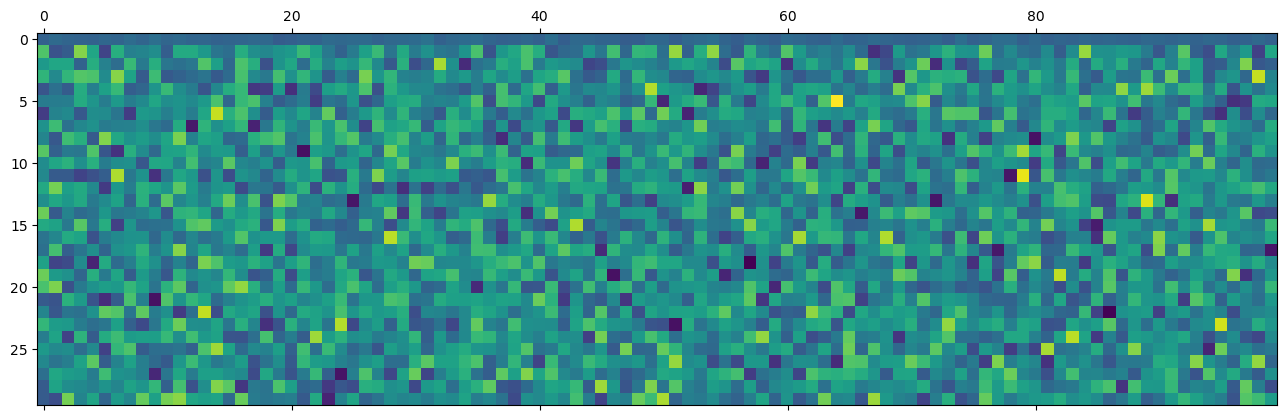

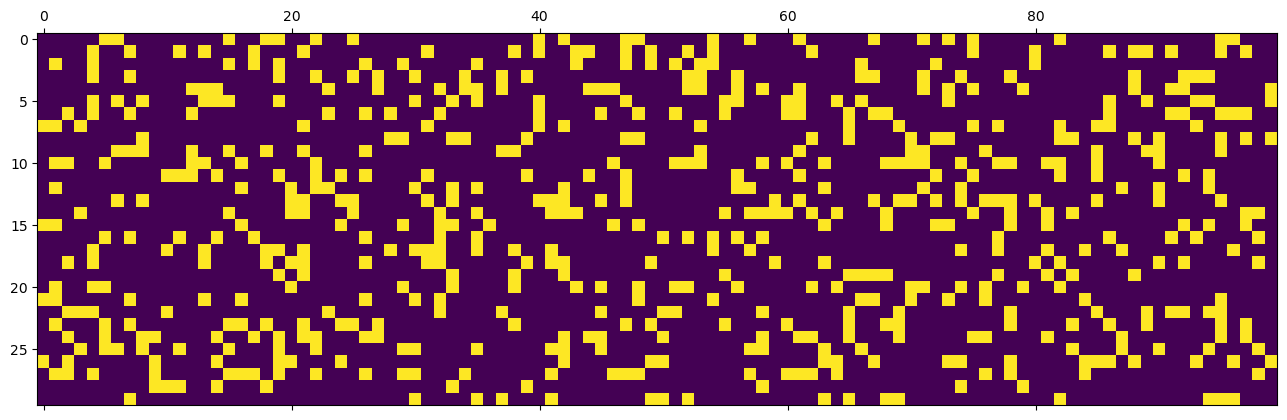

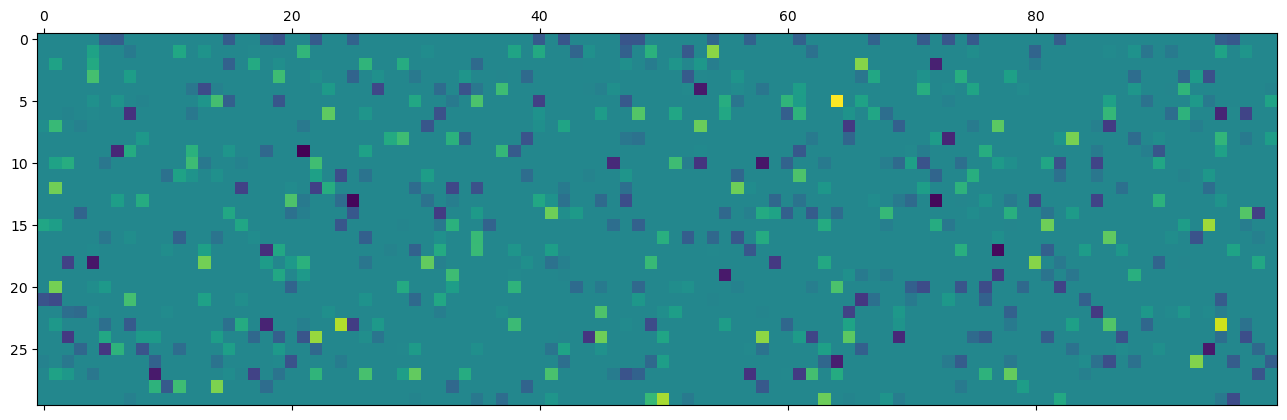

In [24]:
a = M.copy()
r = 0.8
b = np.random.choice([0, 1], size=a.shape, p=[r, 1-r])
plt.matshow(a)
plt.matshow(b)
plt.matshow(a*b)

Ahora si, podemos proceder a perturbar la red neuronal 2.0 en forma sistemática, y medir que tan bien sigue precidiendo los vectores de salida esperados:

(0.0, 1.0)

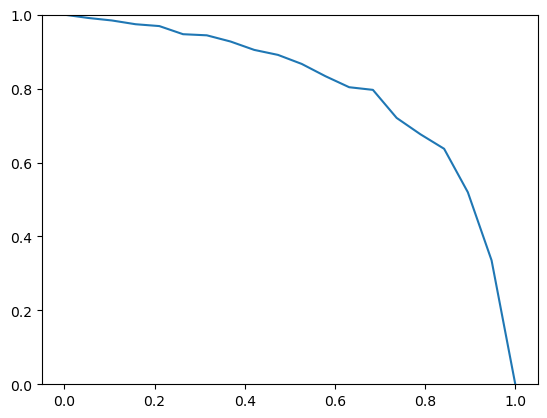

In [25]:
# Normaliza un vector
# Da como resultado un vector de norma 1
def normalizar(v):
    norma = np.sqrt(v.T.dot(v))
    if norma == 0:
        return v
    else:
        return v / norma

# Dada una red neuronal Mp, una matriz de entrada E y una matriz de salida esperada S:
# Para cada par de vectores de entrada E_i y de salida S_i, calcula el resultado de la red neuronal
# Y devuelve el promedio de todos los cosenos.
def evaluanet(Mp, E, S):
    # Obtenemos el numero de filas y columnas
    m = E.shape[0]
    n = E.shape[1]

    # Inicializamos un vector que va a guardar los cosenos para cada par de vectores de salida esperada
    # y salida obtenida
    cosenos = 0

    # Recorremos cada columna
    for i in np.arange(n):
        # Creamos los vectores de entrada y salida esperada
        E_i = E[:,i]
        S_i = S[:,i]

        # Creamos el vector resultado de la red neural
        S_ir = Mp.dot(E_i)

        # Calculamos la similitud entre la salida esperada y el resultado obtenido con la red
        cosenos += normalizar(S_i).T.dot(normalizar(S_ir))

    # Devolvemos el promedio
    return cosenos / n

# Creamos un vector de largo 20 con valores entre 0 y 1
# Por ejemplo, si fuese de largo 3, quedaria: [0, 0.5, 1]
destroy_rates = np.linspace(0, 1, 20, endpoint=True)

# Creamos un vector 
correlaciones = np.zeros(len(destroy_rates))

j = 0
for rd in destroy_rates:
    # Creamos una matriz de misma forma que M con ceros y unos
    # Con un porcentaje de ceros dado por rd
    destroy_matrix = np.random.choice([0, 1], size=M.shape, p=[rd, 1-rd])

    # Perturbamos M
    Mp = M * destroy_matrix

    # Vemos que tan bien predice la red neuronal
    correlaciones[j] = evaluanet(Mp, E, S)
    j=j+1

# Graficamos las correlaciones
plt.plot(destroy_rates,correlaciones)
plt.ylim(0,1)